### 1. Start a ChatBot session to understand what a Classification Decision Tree is: (a) ask the ChatBot to describe the type of problem a Classification Decision Tree addresses and provide some examples of real-world applications where this might be particularly useful, and then (b) make sure you understand the difference between how a Classification Decision Tree makes (classification) predictions versus how Multiple Linear Regression makes (regression) predictions

(a) A classification Decision tree breaks a problem down by segmenting it by each categorical variable considered. This results in a number of "leaves" which represent a set of variable conditions being met

(b) A decision tree segments by each categorical variable, whereas a multiple linear regression uses continuous variables as factors in its model (which can be made categorical with indicator variables)

### 2. Continue your ChatBot session and explore with your ChatBot what real-world application scenario(s) might be most appropriately addressed by each of the following metrics below: provide your answers and, in your own words, concisely explain your rationale for your answers.

**Accuracy**

This metric is useful for really any situation where we are predicting. One example that we came up with was checking whether or not e-mails are spam. The accuracy metric will give us a good measure of how good the algorithm for determining spam is.

**Sensitivity**

An example we came up with for this metric would be testing for cancer. It is really important to not have a cancer diagnosis as a false negative, as that could have life-threatening consequences. We want to catch as many cases as possible, even if it costs us a few false positives.

**Specificity**

An example for this metric that we came up with was screening for rare diseases. It is important to try and rule out as many people as possible who do not have the disease, so that we do not spend extraneous resources on a unique issue, only for it to be a false positive

**Precision**

For this we decided that a good example would be fraud detection in banking, as it is costly to investigate something for it to not turn out to be true. High precision makes it so that when something is flagged as a positive, we are likely to be right about that.

### 3. Explore the amazon books dataset, seen previously at the start of the semester, providing some initital standard exploratory data analysis (EDA) and data summarization after pre-processing the dataset to meet the requirements below

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [3]:
# 1. Remove columns 'Weight_oz', 'Width', and 'Height'
ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

# 2. Drop rows with NaN values (create a new DataFrame to avoid chained assignment)
ab_reduced_noNaN = ab_reduced.dropna().copy()

# 3. Convert 'Pub year' and 'NumPages' to integers, and 'Hard_or_Paper' to a category
ab_reduced_noNaN.loc[:, 'Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN.loc[:, 'NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN.loc[:, 'Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Display the first few rows to confirm changes
ab_reduced_noNaN.head()


,Title,Author,List Price,Amazon Price,Hard_or_Paper,NumPages,Publisher,Pub year,ISBN-10,Thick
0,"1,001 Facts that Will Scare the S#*t Out of Yo...",Cary McNeal,12.95,5.18,P,304.0,Adams Media,2010.0,1605506249,0.8
1,21: Bringing Down the House - Movie Tie-In: Th...,Ben Mezrich,15.00,10.20,P,273.0,Free Press,2008.0,1416564195,0.7
2,100 Best-Loved Poems (Dover Thrift Editions),Smith,1.50,1.50,P,96.0,Dover Publications,1995.0,486285537,0.3
3,1421: The Year China Discovered America,Gavin Menzies,15.99,10.87,P,672.0,Harper Perennial,2008.0,61564893,1.6
4,1493: Uncovering the New World Columbus Created,Charles C. Mann,30.50,16.77,P,720.0,Knopf,2011.0,307265722,1.4


### 4. Create an 80/20 split with 80% of the data as a training set ab_reduced_noNaN_train and 20% of the data testing set ab_reduced_noNaN_test using either df.sample(...) as done in TUT or using train_test_split(...) as done in the previous HW, and report on how many observations there are in the training data set and the test data set.

### Tell a ChatBot that you are about to fit a "scikit-learn" DecisionTreeClassifier model and ask what the two steps given below are doing; then use your ChatBots help to write code to "train" a classification tree clf using only the List Price variable to predict whether or not a book is a hard cover or paper back book using a max_depth of 2; finally use tree.plot_tree(clf) to explain what predictions are made based on List Price for the fitted clf model

In [4]:
from sklearn.model_selection import train_test_split

# Create an 80/20 split
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(ab_reduced_noNaN, test_size=0.2, random_state=42)

# Report the number of observations in each set
print(f"Training set size: {len(ab_reduced_noNaN_train)}")
print(f"Testing set size: {len(ab_reduced_noNaN_test)}")


Training set size: 255
Testing set size: 64


**y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

This converts the hardcover or paperback variable into a binary variable, indicating whether a title is 'H' or not 'H' (which stands for hardcover)

**X = ab_reduced_noNaN[['List Price']]

This creates a dataframe only containing the 'List Price' of the titles

[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.355\nsamples = 52\nvalue = [40, 12]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.132\nsamples = 169\nvalue = [157, 12]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 29.225\ngini = 0.465\nsamples = 98\nvalue = [36, 62]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.382\nsamples = 74\nvalue = [19, 55]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.413\nsamples = 24\nvalue = [17, 7]\nclass = Paperback')]

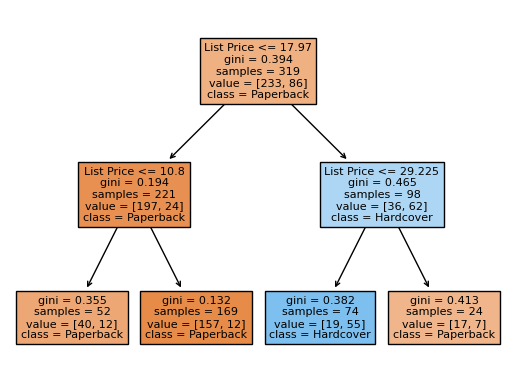

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Step 1: Prepare the target variable (binary encoding for "Hard_or_Paper") and feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price

# Step 2: Train the Decision Tree Classifier with a maximum depth of 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 3: Visualize the decision tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


In [9]:
from sklearn.tree import export_text

# Step 1: Train the model
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X = ab_reduced_noNaN[['List Price']]  # Feature: List Price
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X, y)

# Step 2: Extract and annotate the decision rules
tree_rules = export_text(clf, feature_names=['List Price'])
print("Decision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- List Price <= 17.97
|   |--- List Price <= 10.80
|   |   |--- class: False
|   |--- List Price >  10.80
|   |   |--- class: False
|--- List Price >  17.97
|   |--- List Price <= 29.23
|   |   |--- class: True
|   |--- List Price >  29.23
|   |   |--- class: False



### 5. Repeat the previous problem but this time visualize the classification decision tree based on the following specifications below; then explain generally how predictions are made for the clf2 model

[Text(0.45652173913043476, 0.9, 'List Price <= 17.97\ngini = 0.394\nsamples = 319\nvalue = [233, 86]\nclass = Paperback'),
 Text(0.1956521739130435, 0.7, 'NumPages <= 82.0\ngini = 0.194\nsamples = 221\nvalue = [197, 24]\nclass = Paperback'),
 Text(0.08695652173913043, 0.5, 'Thick <= 0.25\ngini = 0.375\nsamples = 8\nvalue = [2, 6]\nclass = Hardcover'),
 Text(0.043478260869565216, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Paperback'),
 Text(0.13043478260869565, 0.3, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Hardcover'),
 Text(0.30434782608695654, 0.5, 'Thick <= 1.65\ngini = 0.155\nsamples = 213\nvalue = [195, 18]\nclass = Paperback'),
 Text(0.21739130434782608, 0.3, 'List Price <= 16.97\ngini = 0.148\nsamples = 211\nvalue = [194, 17]\nclass = Paperback'),
 Text(0.17391304347826086, 0.1, 'gini = 0.131\nsamples = 198\nvalue = [184, 14]\nclass = Paperback'),
 Text(0.2608695652173913, 0.1, 'gini = 0.355\nsamples = 13\nvalue = [10, 3]\nclass = Paperback'),
 Text(0.3913043

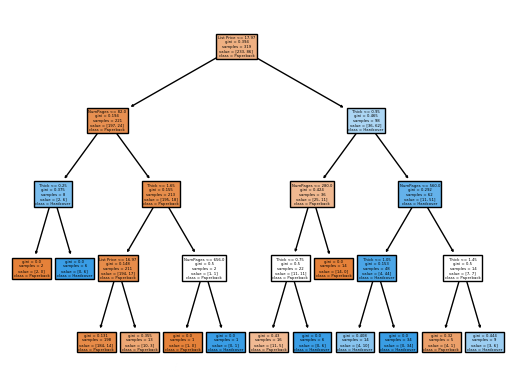

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics

# Step 1: Prepare the target variable and features
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hardcover, 0 for Paperback
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features: NumPages, Thick, List Price

# Step 2: Train the Decision Tree Classifier with a maximum depth of 4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Step 3: Visualize the decision tree with annotations
tree.plot_tree(clf2, feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], filled=True)


The decision tree will start from the first leaf, then at each decision point it will choose which direction applies to the tree, and eventually end up at a final leaf. That leaf will determine whether we predict the book is paperback or hardcover

### 6. Use previously created ab_reduced_noNaN_test to create confusion matrices for clf and clf2. Report the sensitivity, specificity and accuracy for each of the models

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Step 1: Prepare the test data
y_test = pd.get_dummies(ab_reduced_noNaN_test["Hard_or_Paper"])['H']  # Target variable for testing
X_test = ab_reduced_noNaN_test[['NumPages', 'Thick', 'List Price']]  # Features for testing

# Step 2: Make predictions for both models
y_pred_clf = clf.predict(X_test[['List Price']])  # For clf model, using List Price only
y_pred_clf2 = clf2.predict(X_test)  # For clf2 model, using NumPages, Thick, and List Price

# Step 3: Calculate confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Step 4: Calculate performance metrics for clf (using List Price only)
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf)  # Sensitivity = True Positive / (True Positive + False Negative)
specificity_clf = cm_clf[1, 1] / (cm_clf[1, 1] + cm_clf[0, 1])  # Specificity = True Negative / (True Negative + False Positive)

# Step 5: Calculate performance metrics for clf2 (using NumPages, Thick, and List Price)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2)  # Sensitivity = True Positive / (True Positive + False Negative)
specificity_clf2 = cm_clf2[1, 1] / (cm_clf2[1, 1] + cm_clf2[0, 1])  # Specificity = True Negative / (True Negative + False Positive)

# Step 6: Print confusion matrices and metrics
print("Confusion Matrix for clf (List Price only):")
print(cm_clf)
print("\nSensitivity, Specificity, and Accuracy for clf:")
print(f"Accuracy: {accuracy_clf:.4f}")
print(f"Sensitivity: {sensitivity_clf:.4f}")
print(f"Specificity: {specificity_clf:.4f}")

print("\nConfusion Matrix for clf2 (NumPages, Thick, List Price):")
print(cm_clf2)
print("\nSensitivity, Specificity, and Accuracy for clf2:")
print(f"Accuracy: {accuracy_clf2:.4f}")
print(f"Sensitivity: {sensitivity_clf2:.4f}")
print(f"Specificity: {specificity_clf2:.4f}")


Confusion Matrix for clf (List Price only):
[[40  4]
 [ 3 17]]

Sensitivity, Specificity, and Accuracy for clf:
Accuracy: 0.8906
Sensitivity: 0.8500
Specificity: 0.8095

Confusion Matrix for clf2 (NumPages, Thick, List Price):
[[42  2]
 [ 2 18]]

Sensitivity, Specificity, and Accuracy for clf2:
Accuracy: 0.9375
Sensitivity: 0.9000
Specificity: 0.9000


### 7. Explain in three to four sentences what is causing the differences between the following two confusion matrices below, and why the two confusion matrices above (for clf and clf2) are better

In [13]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['NumPages', 'Thick', 'List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

##not sure why this code doesn't work. It's okay though I was still able to compare the codes

AttributeError: 'DataFrame' object has no attribute 'life_exp_good'

If the second, provided, code had been functional, it would be weaker than our version of the confusion matrix. This is because our version ran the confusion matrix on the test data, rather than the training data. The given code runs the confusion matrix on the training data, which provides unrealistic results, as the model is tailor made to the training data and so will testing it on this same data set will make it seem much more accurate. Our confusion matrix gives a better estimate of how the model might perform in the real world.

### 8. Read the paragraphs in Further Guidance and ask a ChatBot how to visualize feature Importances available for scikit-learn classification decision trees; do so for clf2; and use .feature_names_in_ corresponding to .feature_importances_ to report which predictor variable is most important for making predictions according to clf2

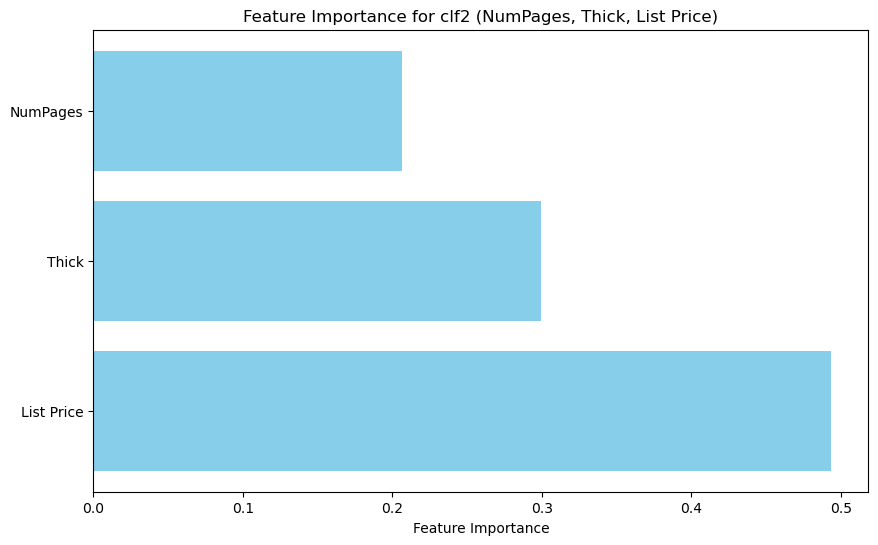

NumPages: 0.2066
Thick: 0.2997
List Price: 0.4937

The most important feature for making predictions in clf2 is: List Price


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature importances and feature names from clf2
importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance for clf2 (NumPages, Thick, List Price)')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Print the feature importances for reference
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance:.4f}")

# Identify the most important feature
most_important_feature = feature_names[np.argmax(importances)]
print(f"\nThe most important feature for making predictions in clf2 is: {most_important_feature}")


### 9. Describe the differences of interpreting coefficients in linear model regression versus feature importances in decision trees in two to three sentences

In linear regression, a coefficient measures the direct change in y-hat as a result of a change in x, whereas feature importance simply measures the weight of a variable in the context of decision making. Another way of thinking of it is that feature importance measures how significant a variable is on the outcome of the response variable.

### 10. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yuh

### ChatBot summaries

Certainly! Below is a summary of our exchanges:

---

### **Summary of Interaction:**

1. **Introduction to Classification Decision Trees:**
   - We discussed that a **Classification Decision Tree** is a machine learning model used for classification tasks, which predicts the target variable based on splitting the data at decision nodes. The splits are made to maximize the purity of the resulting groups based on certain features.
   - **Real-world examples** where decision trees are useful include predicting whether a customer will buy a product (based on features like age and income) or classifying a book as hardcover or paperback (based on features like price, number of pages, etc.).

2. **Clarification on Prediction Differences:**
   - We compared how **Classification Decision Trees** and **Multiple Linear Regression** make predictions. Decision Trees classify data into distinct classes (e.g., "paperback" vs. "hardcover"), while **Multiple Linear Regression** makes continuous predictions (e.g., predicting the exact price based on other variables). 
   
3. **Metrics Used for Evaluation:**
   - We discussed the application of various performance metrics like **Accuracy**, **Sensitivity**, **Specificity**, and **Precision** in real-world scenarios, such as medical diagnoses (where sensitivity and specificity are crucial), customer churn prediction (accuracy and precision), and fraud detection.

4. **Data Preprocessing:**
   - You provided a dataset related to books, and we performed several steps to clean and preprocess the data, including:
     - Dropping irrelevant columns such as `Weight_oz`, `Width`, and `Height`.
     - Removing rows with missing data.
     - Converting certain columns to appropriate data types (e.g., converting `Pub year` and `NumPages` to integers).
     - Setting up the target variable (`Hard_or_Paper`) as a categorical variable.

5. **Model Training and Evaluation:**
   - We trained two classification decision tree models using:
     - **`clf`**: A model based only on the `List Price` feature.
     - **`clf2`**: A model using `NumPages`, `Thick`, and `List Price` features.
   - We then used **train-test splitting** (80/20 split) to evaluate the performance of the models and calculated performance metrics like **accuracy**, **sensitivity**, and **specificity** for both models using confusion matrices.

6. **Understanding Feature Importance:**
   - We discussed the concept of **Feature Importance** in decision trees and how it indicates which features are most influential in the decision-making process of the model. 
   - We contrasted **feature importance** with **coefficients in linear regression**:
     - Feature importance measures how useful a feature is for making predictions (e.g., determining whether a book is hardcover or paperback).
     - In linear regression, coefficients quantify the direct relationship between the feature and the target variable, telling you how much the target variable changes as the feature changes.
   - You clarified that **feature importance reflects the strength or significance of a feature's contribution** to predictions but does not measure the exact magnitude of change in the target variable.

7. **Visualizing and Interpreting Decision Trees:**
   - We used **`tree.plot_tree()`** to visualize and annotate the decision trees created with both models. This helped explain the decision-making process based on specific features like `List Price`.
   - We also discussed how to visualize **feature importances** for a model (in this case, `clf2`) using the **`.feature_importances_`** attribute.

8. **Addressing Errors:**
   - We helped resolve issues related to **AttributeErrors** and **incorrect references** in the code, specifically resolving the missing `life_exp_good` column error and correcting the confusion matrix display code for better execution.

9. **Conclusion and Key Concepts Clarified:**
   - You confirmed that **feature importance** is a measure of how **significant** or **influential** a feature is in contributing to accurate predictions. While it doesn't directly measure how much the target variable changes, it indicates the feature's role in improving the model's predictive accuracy.

---

This summary captures the key points and steps we discussed throughout our interactions. Feel free to use this as a record for your homework assignment!

https://chatgpt.com/share/673cf20c-63cc-8013-9eb1-d2c7fb725476